In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import seaborn as sns
sns.set() # just the theme

In [2]:
RANDOM_SEED = 0x0

# Logistic regression on the fashion MNIST-dataset

## Data Exploration and Preprocessing

We are using the Fashion MNIST Dataset from Zalando.
Firstly, we load the dataset.



In [3]:
from keras.datasets import fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape)
print(y_train_full.shape)
print(X_train_full.dtype)
print(y_train_full.dtype)

(60000, 28, 28)
(60000,)
uint8
uint8


In [4]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In following task we will only use training part of the dataset.

#### Prepare data
1. assign following datatypes to the arrays:
   - X_train -> 'float32'
   - y_train -> 'int64'
2. reshape X_train to 2-dimensional array.
Note:
   - it should have the same amount of samples/rows.
3. split the training data into (X_train, y_train) and (X_valid, y_valid), set the size of the validation dataset to 20% of the data and set random state = 42.

In [5]:
X_train_full = np.array(X_train_full, dtype = 'float32').reshape((60000, 28*28))
y_train_full = np.array(y_train_full, dtype = 'int64')
print(X_train_full.shape)
print(y_train_full.shape)
print(X_train_full.dtype)
print(y_train_full.dtype)

(60000, 784)
(60000,)
float32
int64


In [6]:
X_test = np.array(X_test, dtype = 'float32').reshape((10000, 28*28))
y_test = np.array(y_test, dtype = 'int64')
print(X_test.shape)
print(y_test.shape)
print(X_test.dtype)
print(y_test.dtype)

(10000, 784)
(10000,)
float32
int64


### For hyperparameter tuning we need to chop of a validation set from the full training set
So the training set will become even smaller

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)

(48000, 784)
(48000,)
float32
int64


#### Visualize some data
Plot 25 images (hint: use ``imshow`` and ``subplots`` from matplotlib library), plot the label as title (e.g. shorts).

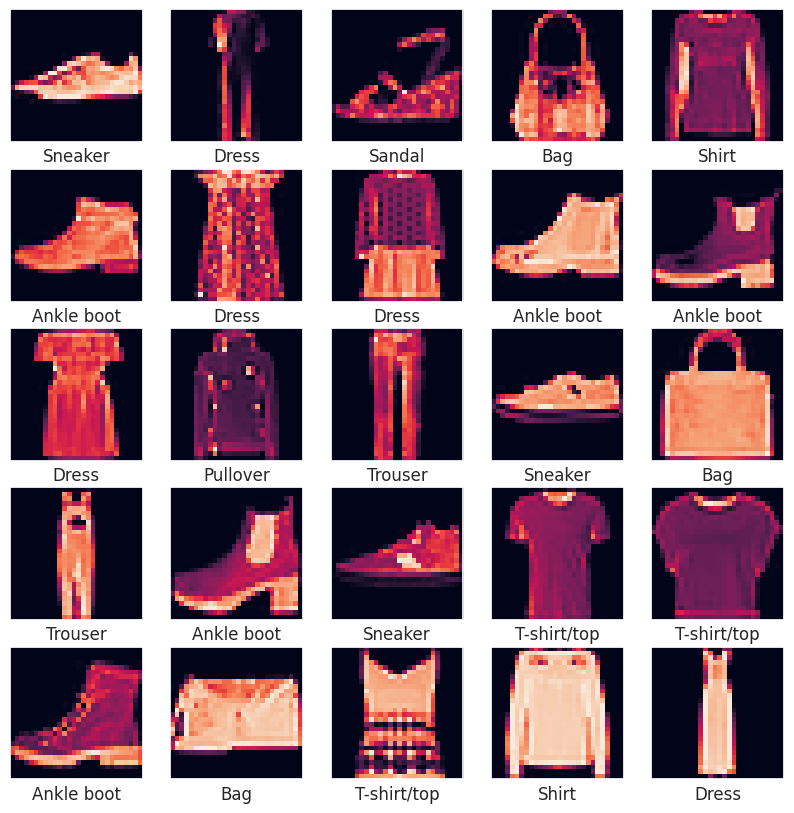

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # empty x-ticks
    plt.yticks([]) # empty y-ticks
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28,28))
    plt.xlabel(label_names[y_train[i]])
plt.show()

#### Standardise the data

In [9]:
mean, std = np.mean(X_train), np.std(X_train)

X_train = (X_train - mean) / std
X_valid = (X_valid - mean) / std
X_test = (X_test - mean) / std

## Modelling
Fit the `LogisticRegression` from `scikit-learn`. Set the `random_state` for reproducibility.

Optional: You can try different parameters for the logistic regression models either by hand or using GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

PredefinedSplit: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.PredefinedSplit.html

You can ignore a warning "STOP: TOTAL NO. of ITERATIONS REACHED LIMIT."

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
clf = LogisticRegression(C=0.001, solver='lbfgs', random_state=0, max_iter=100)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.001, random_state=0)

In [48]:
y_hat_valid = clf.predict(X_valid)

accuracy = accuracy_score(y_valid, y_hat_valid)
print(f"Accuracy on validation set: {accuracy}")

Accuracy on validation set: 0.8471666666666666


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

In [14]:
train_indices = np.full((X_train.shape[0],), -1, dtype=int)

valid_indices = np.full((X_valid.shape[0],), 0, dtype=int)
ps = PredefinedSplit(np.append(train_indices, valid_indices))

params = {'C': [1., 1.3, 1.5], 'solver': ['lbfgs', 'sag']}

clf = LogisticRegression(random_state=0, max_iter=1000)
opt = GridSearchCV(clf, param_grid=params, cv=ps, refit=False)


opt.fit(np.append(X_train, X_valid, axis=0), np.append(y_train, y_valid, axis=0))
print(opt.best_params_)

KeyboardInterrupt: ignored

Use the best found parameters for the next steps. If you have used `GridSearchCV` they are provided in the `best_params_` attribute.

3. Create a new `LogisticRegression` instance with the best found parameters.
4. Fit it on the full training set.
5. On the test set:
  * calculate the accuracy
  * generate the scikit-learn classification report
  * display the confusion matrix

In [17]:
clf = LogisticRegression(random_state=0, max_iter=100) # (**opt.best_params_,)
clf.fit(X_train_full, y_train_full)
y_hat_test = clf.predict(X_test)

Accuracy on test set: 0.6223


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
accuracy = accuracy_score(y_test, y_hat_test)

print(f"Accuracy on test set: {accuracy}")

Accuracy on test set: 0.6223


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test, y_hat_test, target_names=label_names))

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.61      0.72      1000
     Trouser       1.00      0.92      0.96      1000
    Pullover       0.71      0.29      0.41      1000
       Dress       0.79      0.71      0.74      1000
        Coat       0.31      0.98      0.47      1000
      Sandal       0.73      0.75      0.74      1000
       Shirt       0.51      0.07      0.13      1000
     Sneaker       0.54      0.99      0.70      1000
         Bag       0.99      0.22      0.36      1000
  Ankle boot       0.97      0.68      0.80      1000

    accuracy                           0.62     10000
   macro avg       0.74      0.62      0.60     10000
weighted avg       0.74      0.62      0.60     10000



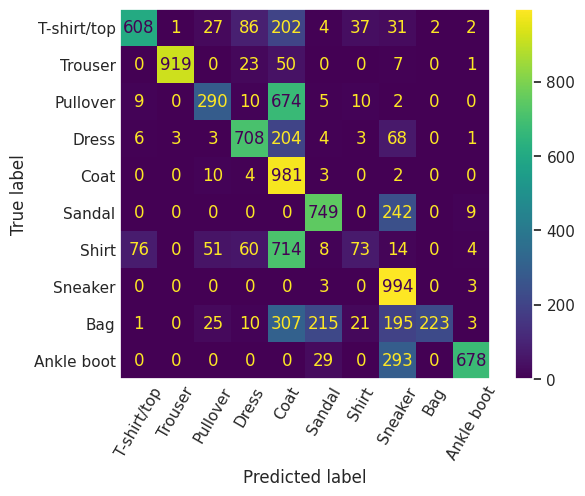

In [46]:
cm = confusion_matrix(y_test, y_hat_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)

disp.plot()

plt.tick_params(axis=u'both', which=u'both',length=0)
plt.tick_params(axis='x', labelrotation=60)
plt.grid(False)

plt.show()